# API querying and Data Wrangling in Python

In [2]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
from wordcloud import WordCloud, STOPWORDS
from PIL import Image 

%matplotlib inline

# 1- Data Gathering

### Import Twitter archived data of WeRateDogs

In [2]:
data_df = pd.read_csv('twitter-archive-enhanced-2.csv')
data_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### programatically Download Image Predictions Data

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name = url.split('/')[-1]
response = requests.get(url)
if not os.path.isfile(file_name):
    with open(file_name, 'wb') as file:
        file.write(response.content)

In [4]:
prediction_df = pd.read_csv('image-predictions.tsv', sep='\t')
prediction_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Querying Twitter API

In [3]:
consumer_key = 'Hidden'
consumer_secret = 'Hidden'
access_token = 'Hidden'
access_secret = 'Hidden'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [6]:
tweet = api.get_status(data_df.tweet_id[10], tweet_mode='extended')
tweet._json

{'created_at': 'Wed Jul 26 00:31:25 +0000 2017',
 'id': 890006608113172480,
 'id_str': '890006608113172480',
 'full_text': 'This is Koda. He is a South Australian deckshark. Deceptively deadly. Frighteningly majestic. 13/10 would risk a petting #BarkWeek https://t.co/dVPW0B0Mme',
 'truncated': False,
 'display_text_range': [0, 130],
 'entities': {'hashtags': [{'text': 'BarkWeek', 'indices': [121, 130]}],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 890006600089468928,
    'id_str': '890006600089468928',
    'indices': [131, 154],
    'media_url': 'http://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg',
    'url': 'https://t.co/dVPW0B0Mme',
    'display_url': 'pic.twitter.com/dVPW0B0Mme',
    'expanded_url': 'https://twitter.com/dog_rates/status/890006608113172480/photo/1',
    'type': 'photo',
    'sizes': {'medium': {'w': 1200, 'h': 1199, 'resize': 'fit'},
     'thumb': {'w': 150, 'h': 150, 

In [7]:
errors = []
if not os.path.isfile('tweet_json.txt'):
    with open('tweet_json.txt', 'w') as file:
        for tweet_id in data_archived['tweet_id']:
            try:
                status = api.get_status(tweet_id, wait_on_rate_limit=True,
                              wait_on_rate_limit_notify=True, tweet_mode='extended')
                json.dump(status._json, file)
                file.write('\n')
            except Exception as e:
                print('error on tweet id:{}'.format(tweet_id) + ';' + str(e))
                errors.append(tweet_id)

### Reading Twitter JSON

In [8]:
# reading tweet_id, retweet_count, favorite_count
list_df = []
with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        list_df.append({'tweet_id': tweet_id,
                    'retweet_count': retweet_count,
                    'favorite_count': fav_count})
        
api_df = pd.DataFrame(list_df)    

In [9]:
api_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7438,35272
1,892177421306343426,5527,30519
2,891815181378084864,3650,22951
3,891689557279858688,7615,38556
4,891327558926688256,8194,36842


# 2- Data Assessment

Three dataframes:

- data_df which has information about each tweet.
- prediction_df has the results of a neural network trying to identify dog breed in a tweet's picture.
- api_df has which has retweet and favorite counts for each tweet.

In [10]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
data_df.describe(include='all')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
count,2.356000e+03,7.800000e+01,7.800000e+01,2356,2356,2356,1.810000e+02,1.810000e+02,181,2297,2356.000000,2356.000000,2356,2356,2356,2356,2356
unique,NaN,NaN,NaN,2356,4,2356,NaN,NaN,181,2218,NaN,NaN,957,2,2,2,2
top,NaN,NaN,NaN,2016-07-28 19:06:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Howie. He just bloomed. 11/10 revoluti...,NaN,NaN,2017-02-08 17:00:26 +0000,https://twitter.com/dog_rates/status/773308824...,NaN,NaN,None,None,None,None,None
freq,NaN,NaN,NaN,1,2221,1,NaN,NaN,1,2,NaN,NaN,745,2259,2346,2099,2326
mean,7.427716e+17,7.455079e+17,2.014171e+16,NaN,NaN,NaN,7.720400e+17,1.241698e+16,NaN,NaN,13.126486,10.455433,NaN,NaN,NaN,NaN,NaN
std,6.856705e+16,7.582492e+16,1.252797e+17,NaN,NaN,NaN,6.236928e+16,9.599254e+16,NaN,NaN,45.876648,6.745237,NaN,NaN,NaN,NaN,NaN
min,6.660209e+17,6.658147e+17,1.185634e+07,NaN,NaN,NaN,6.661041e+17,7.832140e+05,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,6.783989e+17,6.757419e+17,3.086374e+08,NaN,NaN,NaN,7.186315e+17,4.196984e+09,NaN,NaN,10.000000,10.000000,NaN,NaN,NaN,NaN,NaN
50%,7.196279e+17,7.038708e+17,4.196984e+09,NaN,NaN,NaN,7.804657e+17,4.196984e+09,NaN,NaN,11.000000,10.000000,NaN,NaN,NaN,NaN,NaN
75%,7.993373e+17,8.257804e+17,4.196984e+09,NaN,NaN,NaN,8.203146e+17,4.196984e+09,NaN,NaN,12.000000,10.000000,NaN,NaN,NaN,NaN,NaN


In [12]:
data_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [13]:
data_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [14]:
data_df.rating_denominator.sort_values()

313       0
2335      2
516       7
1576     10
1575     10
       ... 
1635    110
1779    120
1634    130
902     150
1120    170
Name: rating_denominator, Length: 2356, dtype: int64

In [15]:
data_df.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [16]:
data_df.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [17]:
prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [18]:
prediction_df.describe(include='all')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
count,2.075000e+03,2075,2075.000000,2075,2075.000000,2075,2075,2.075000e+03,2075,2075,2.075000e+03,2075
unique,NaN,2009,NaN,378,NaN,2,405,NaN,2,408,NaN,2
top,NaN,https://pbs.twimg.com/media/Cs_DYr1XEAA54Pu.jpg,NaN,golden_retriever,NaN,True,Labrador_retriever,NaN,True,Labrador_retriever,NaN,True
freq,NaN,2,NaN,150,NaN,1532,104,NaN,1553,79,NaN,1499
mean,7.384514e+17,NaN,1.203855,NaN,0.594548,NaN,NaN,1.345886e-01,NaN,NaN,6.032417e-02,NaN
std,6.785203e+16,NaN,0.561875,NaN,0.271174,NaN,NaN,1.006657e-01,NaN,NaN,5.090593e-02,NaN
min,6.660209e+17,NaN,1.000000,NaN,0.044333,NaN,NaN,1.011300e-08,NaN,NaN,1.740170e-10,NaN
25%,6.764835e+17,NaN,1.000000,NaN,0.364412,NaN,NaN,5.388625e-02,NaN,NaN,1.622240e-02,NaN
50%,7.119988e+17,NaN,1.000000,NaN,0.588230,NaN,NaN,1.181810e-01,NaN,NaN,4.944380e-02,NaN
75%,7.932034e+17,NaN,1.000000,NaN,0.843855,NaN,NaN,1.955655e-01,NaN,NaN,9.180755e-02,NaN


In [19]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [20]:
api_df.describe()

,tweet_id,retweet_count,favorite_count
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,2612.144573,7368.758473
std,6.823170e+16,4419.607538,11443.418892
min,6.660209e+17,1.000000,0.000000
25%,6.782670e+17,529.000000,1280.000000
50%,7.182469e+17,1220.000000,3199.000000
75%,7.986692e+17,3032.000000,9018.500000
max,8.924206e+17,75074.000000,151937.000000


In [21]:
api_df.tweet_id.nunique()

2331

# Assessment Summary

> ## Tidiness

**A) Merging:**

   **1-**     merging all 3 dataframes
    
**B) data_df:**

**2-**   no need for those columns: `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`,`expanded_urls`, `img_num`, and `jpg_url` .

**3-**   Dog stage's 4 values: doggo, floofer, pupper, puppo should be in a single column called `dog_stage` since they all refer to one variable.

**4-**    `timestamp` column contains six variables: day, month, year, hour, minute, second. 

**C) prediction_df:**

**4-**   Image prediction can be summarized to one column 'dog_breed'.




> ## Quality 


**D)  data_df:**


**1-**	We only need the original tweets without retweets (181) or  replies (78).

**2-**	`name` column contains inaccurate names such as 'a', 'an', and 'None' instead of np.nan

**3-**	`timestamp` column is object data type, while it should be datatime to perfrom time series operations. 

**4-**	`rating_denominator` should equal 10, and `rating_numerator` column has multiple outliers.

**5-**	`rating_denominator` can be dropped since it always equals 10, then rename rating_numerator to rating.

**6-**	binning the new column `rating` in (low, medium, high) to better understand the data.

**7-**	`timestamp` column has extra +0000.


**E)  Pridiction_df**

**1-**	Columns name should be more descriptive and easy to understand.


# 3- Data Cleaning


In [22]:
# making copies of dataframes for cleaning 
data_df_clean = data_df.copy()
prediction_df_clean = prediction_df.copy()
api_df_clean = api_df.copy()

## Structrual issues:

**A.1)**

**Define: merge `data_df_clean`, `prediction_df_clean`, `api_df_clean` on `tweet_id`**

**Code:**

In [23]:
# merge 'data_df_clean' and 'prediction_df_clean'
master_df_clean = pd.merge(data_df_clean, prediction_df_clean,
                                   how = 'inner', on = 'tweet_id')
# merge 'master_df_clean' and 'api_df_clean'
master_df_clean = pd.merge(master_df_clean, api_df_clean,
                                   how = 'inner', on = 'tweet_id')

**Test:**

In [24]:
master_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2059 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2059 non-null   object 
 4   source                      2059 non-null   object 
 5   text                        2059 non-null   object 
 6   retweeted_status_id         72 non-null     float64
 7   retweeted_status_user_id    72 non-null     float64
 8   retweeted_status_timestamp  72 non-null     object 
 9   expanded_urls               2059 non-null   object 
 10  rating_numerator            2059 non-null   int64  
 11  rating_denominator          2059 non-null   int64  
 12  name                        2059 non-null   object 
 13  doggo                       2059 

**B.2)** | **D.1)**


**Define: drop these columns; `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, `expanded_urls`, `img_num`, and `jpg_url`**

**First: use `in_reply_to_status_id` and `retweeted_status_id` to keep only the original tweets without replies or retweets before dropping them.**

**Code:**

In [25]:
# Drop retweets
master_df_clean = master_df_clean[master_df_clean.retweeted_status_id.isnull()]

# Drop replies
master_df_clean = master_df_clean[master_df_clean.in_reply_to_status_id.isnull()]

In [26]:
master_df_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id',
                              'retweeted_status_id', 'retweeted_status_user_id',
                              'retweeted_status_timestamp', 'expanded_urls', 'img_num', 'jpg_url'], inplace=True)

**Test:**

In [27]:
master_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2058
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1964 non-null   int64  
 1   timestamp           1964 non-null   object 
 2   source              1964 non-null   object 
 3   text                1964 non-null   object 
 4   rating_numerator    1964 non-null   int64  
 5   rating_denominator  1964 non-null   int64  
 6   name                1964 non-null   object 
 7   doggo               1964 non-null   object 
 8   floofer             1964 non-null   object 
 9   pupper              1964 non-null   object 
 10  puppo               1964 non-null   object 
 11  p1                  1964 non-null   object 
 12  p1_conf             1964 non-null   float64
 13  p1_dog              1964 non-null   bool   
 14  p2                  1964 non-null   object 
 15  p2_conf             1964 non-null   float64
 16  p2_dog

**B.3)**

**Define: `doggo, floofer, pupper, puppo` columns should be in a single column called `dog_stage` since they all refer to one variable.**

**Code:**

In [28]:
# Extract doggo, floofer, pupper, puppo from 'text' column
master_df_clean['dog_stage'] = master_df_clean['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)

# Drop 'doggo', 'floofer', 'pupper', 'puppo' columns
master_df_clean = master_df_clean.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'])

**Test:**

In [29]:
master_df_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,7438,35272,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5527,30519,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3650,22951,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,7615,38556,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,8194,36842,NaN


**B.4) |D.3) | D.7)**


**Define: `time_stamp` column contains six variables: day, month, year, hour, minute, second.**


**First, strip '+0000' before converting the data type**

**Code:**

In [30]:
# Strip +0000 from timestamp column
master_df_clean.timestamp = master_df_clean['timestamp'].str.strip('+0000')

In [31]:
# convert 'timestamp' data type to datetime 
master_df_clean['timestamp'] = pd.to_datetime(master_df_clean['timestamp'])
 
# Extract year, month and hour in new columns
master_df_clean['month'] = master_df_clean['timestamp'].dt.month
master_df_clean['hour'] = master_df_clean['timestamp'].dt.hour
master_df_clean['year'] = master_df_clean['timestamp'].dt.year

**Test:**

In [32]:
master_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2058
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1964 non-null   int64         
 1   timestamp           1964 non-null   datetime64[ns]
 2   source              1964 non-null   object        
 3   text                1964 non-null   object        
 4   rating_numerator    1964 non-null   int64         
 5   rating_denominator  1964 non-null   int64         
 6   name                1964 non-null   object        
 7   p1                  1964 non-null   object        
 8   p1_conf             1964 non-null   float64       
 9   p1_dog              1964 non-null   bool          
 10  p2                  1964 non-null   object        
 11  p2_conf             1964 non-null   float64       
 12  p2_dog              1964 non-null   bool          
 13  p3                  1964 non-null   object      

In [33]:
master_df_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,p1,p1_conf,p1_dog,...,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage,month,hour,year
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,orange,0.097049,False,...,False,banana,0.076110,False,7438,35272,NaN,8,16,2017
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,Chihuahua,0.323581,True,...,True,papillon,0.068957,True,5527,30519,NaN,8,0,2017
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,Chihuahua,0.716012,True,...,True,kelpie,0.031379,True,3650,22951,NaN,7,0,2017
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,paper_towel,0.170278,False,...,True,spatula,0.040836,False,7615,38556,NaN,7,15,2017
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,basset,0.555712,True,...,True,German_short-haired_pointer,0.175219,True,8194,36842,NaN,7,16,2017


**C.4) | E.1)**

**Define: Image prediction can be summarized to one column `dog_breed`, keep the most probable prediction and drop other probabilities, then give columns more descritptive names**

**Code:**

In [34]:
# drop less probable predictions, keep the highest prediction in 'dog_breed' column 

master_df_clean.drop(columns= ['p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1, inplace=True)

In [35]:
# rename p1, p1_conf

master_df_clean.rename(columns={'p1': 'dog_breed', 'p1_conf': 'Pvalue'}, inplace=True)

**Test:**

In [36]:
master_df_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_breed,Pvalue,retweet_count,favorite_count,dog_stage,month,hour,year
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,orange,0.097049,7438,35272,NaN,8,16,2017
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,Chihuahua,0.323581,5527,30519,NaN,8,0,2017
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,Chihuahua,0.716012,3650,22951,NaN,7,0,2017
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,paper_towel,0.170278,7615,38556,NaN,7,15,2017
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,basset,0.555712,8194,36842,NaN,7,16,2017


In [37]:
master_df_clean.name.value_counts()

None            524
a                55
Oliver           10
Cooper           10
Charlie          10
               ... 
Alexanderson      1
Nugget            1
Oshie             1
Snoop             1
Tedrick           1
Name: name, Length: 933, dtype: int64

**D.2)**

**Define: dealing with inaccurate values in 'name' column such as 'an', 'a' and 'None'**

**Code:**

In [38]:
# get rid of inaccurate format such as 'a' and 'an' in 'name'
    
master_df_clean = master_df_clean[master_df_clean.name.str.istitle()]

**Test:**

In [39]:
master_df_clean.name.value_counts()

None            524
Oliver           10
Cooper           10
Charlie          10
Tucker            9
               ... 
Vince             1
Alexanderson      1
Nugget            1
Oshie             1
Tedrick           1
Name: name, Length: 906, dtype: int64

In [40]:
# replace None with np.nan
master_df_clean.name.replace('None', np.nan, inplace= True)

In [41]:
master_df_clean.name.value_counts()

Oliver          10
Charlie         10
Cooper          10
Lucy             9
Penny            9
                ..
Vince            1
Alexanderson     1
Nugget           1
Oshie            1
Tedrick          1
Name: name, Length: 905, dtype: int64

**D.4)**

**Define: `rating_denominator` should equal 10, and `rating_numerator` column has multiple outliers.**

**Code:**

In [42]:
# keeping only rows that has 10 as denominator
master_df_clean = master_df_clean[master_df_clean.rating_denominator ==10]

#get rid of outliers in 'rating_numerator'
master_df_clean = master_df_clean[master_df_clean.rating_numerator <= 15]

**Test:**

In [43]:
master_df_clean.rating_denominator.value_counts()

10    1841
Name: rating_denominator, dtype: int64

In [44]:
master_df_clean.rating_numerator.value_counts()

12    429
10    392
11    374
13    245
9     135
8      88
7      45
5      32
6      30
14     29
3      18
4      12
2       7
1       4
0       1
Name: rating_numerator, dtype: int64

**D.5)**

**Define: rating_denominator can be dropped since it always equals 10, then rename rating_numerator to rating.**

**Code:**

In [45]:
master_df_clean.drop(columns='rating_denominator', axis=1, inplace=True)

In [46]:
master_df_clean.rename(columns={'rating_numerator': 'rating'}, inplace=True)

**Test:**

In [47]:
master_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1841 entries, 0 to 2058
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        1841 non-null   int64         
 1   timestamp       1841 non-null   datetime64[ns]
 2   source          1841 non-null   object        
 3   text            1841 non-null   object        
 4   rating          1841 non-null   int64         
 5   name            1330 non-null   object        
 6   dog_breed       1841 non-null   object        
 7   Pvalue          1841 non-null   float64       
 8   retweet_count   1841 non-null   int64         
 9   favorite_count  1841 non-null   int64         
 10  dog_stage       301 non-null    object        
 11  month           1841 non-null   int64         
 12  hour            1841 non-null   int64         
 13  year            1841 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(7), object(5)
me

**D.6)**

**Define: binning the new column `rating` in (low, medium, high) to better understand the data.**

**Code:**

In [48]:
bins = np.linspace(min(master_df_clean.rating), max(master_df_clean.rating), 4)
group_names = ['Low', 'Medium', 'High']

master_df_clean['rating_binned'] = pd.cut(master_df_clean.rating, bins, labels=group_names, include_lowest = True)

**Test:**

In [49]:
master_df_clean.head(5)

,tweet_id,timestamp,source,text,rating,name,dog_breed,Pvalue,retweet_count,favorite_count,dog_stage,month,hour,year,rating_binned
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,Phineas,orange,0.097049,7438,35272,NaN,8,16,2017,High
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,Tilly,Chihuahua,0.323581,5527,30519,NaN,8,0,2017,High
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,Archie,Chihuahua,0.716012,3650,22951,NaN,7,0,2017,High
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,Darla,paper_towel,0.170278,7615,38556,NaN,7,15,2017,High
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,Franklin,basset,0.555712,8194,36842,NaN,7,16,2017,High


In [50]:
master_df_clean['rating_binned'].value_counts()

High      1469
Medium     330
Low         42
Name: rating_binned, dtype: int64

## Data Storing

In [51]:
# store the clean dataframe
master_df_clean.to_csv('twitter_archive_master.csv', index=False)

# 4- Data Analysis & Visualization

In [52]:
master_df_clean.describe()

,tweet_id,rating,Pvalue,retweet_count,favorite_count,month,hour,year
count,1.841000e+03,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000
mean,7.377652e+17,10.574144,0.595274,2410.643129,8247.945139,7.093427,9.738186,2015.866377
std,6.798233e+16,2.150598,0.273102,4300.394972,11980.493711,4.128239,8.634039,0.699817
min,6.660209e+17,0.000000,0.044333,11.000000,69.000000,1.000000,0.000000,2015.000000
25%,6.766034e+17,10.000000,0.360071,545.000000,1832.000000,3.000000,1.000000,2015.000000
50%,7.101532e+17,11.000000,0.587830,1171.000000,3729.000000,7.000000,4.000000,2016.000000
75%,7.914070e+17,12.000000,0.852088,2764.000000,10332.000000,11.000000,18.000000,2016.000000
max,8.924206e+17,14.000000,1.000000,75074.000000,151937.000000,12.000000,23.000000,2017.000000


In [53]:
master_df_clean.corr()

,tweet_id,rating,Pvalue,retweet_count,favorite_count,month,hour,year
tweet_id,1.000000,0.533268,0.111486,0.378315,0.609776,-0.297618,0.144094,0.880772
rating,0.533268,1.000000,0.107098,0.292670,0.389089,-0.217727,0.095849,0.499500
Pvalue,0.111486,0.107098,1.000000,0.059815,0.084836,-0.027601,0.011304,0.095192
retweet_count,0.378315,0.292670,0.059815,1.000000,0.927007,-0.089263,0.051664,0.322704
favorite_count,0.609776,0.389089,0.084836,0.927007,1.000000,-0.156267,0.055147,0.525046
month,-0.297618,-0.217727,-0.027601,-0.089263,-0.156267,1.000000,0.021728,-0.712975
hour,0.144094,0.095849,0.011304,0.051664,0.055147,0.021728,1.000000,0.093598
year,0.880772,0.499500,0.095192,0.322704,0.525046,-0.712975,0.093598,1.000000


In [54]:
df_twit = master_df_clean.loc[:,['retweet_count', 'favorite_count']]

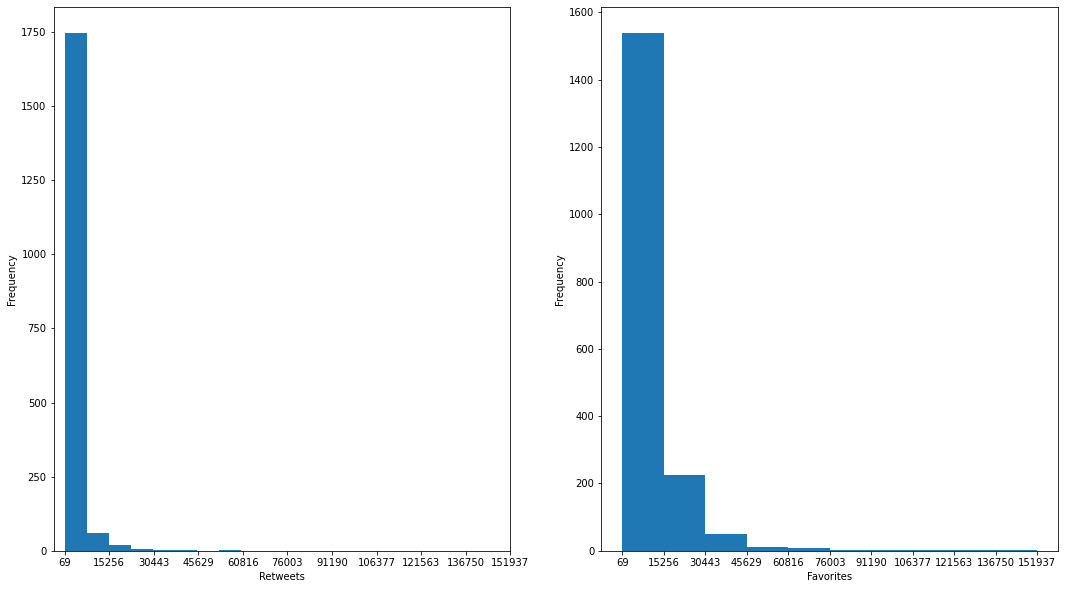

In [55]:
# using Artist layer 

#the x-axis labels should match with the bin size.
#This is done by passing in a `xticks` keyword that contains the list of the bin sizes
count, bin_edges = np.histogram(master_df_clean['retweet_count'])
count, bin_edges = np.histogram(master_df_clean['favorite_count'])

fig = plt.figure(figsize=(18,10))
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

df_twit['retweet_count'].plot(kind='hist', xticks=bin_edges, ax=ax0)
df_twit['favorite_count'].plot(kind='hist', xticks=bin_edges, ax=ax1)
ax0.set_xlabel('Retweets')
ax1.set_xlabel('Favorites')

plt.show()


**Most common dog breed**

In [56]:
master_df_clean.dog_breed.mode()[0]

'golden_retriever'

In [57]:
top10_gen = master_df_clean.dog_breed.value_counts()
top10_gen

golden_retriever       129
Labrador_retriever      86
Pembroke                84
Chihuahua               76
pug                     51
                      ... 
tick                     1
fiddler_crab             1
tiger_shark              1
black-footed_ferret      1
cash_machine             1
Name: dog_breed, Length: 359, dtype: int64

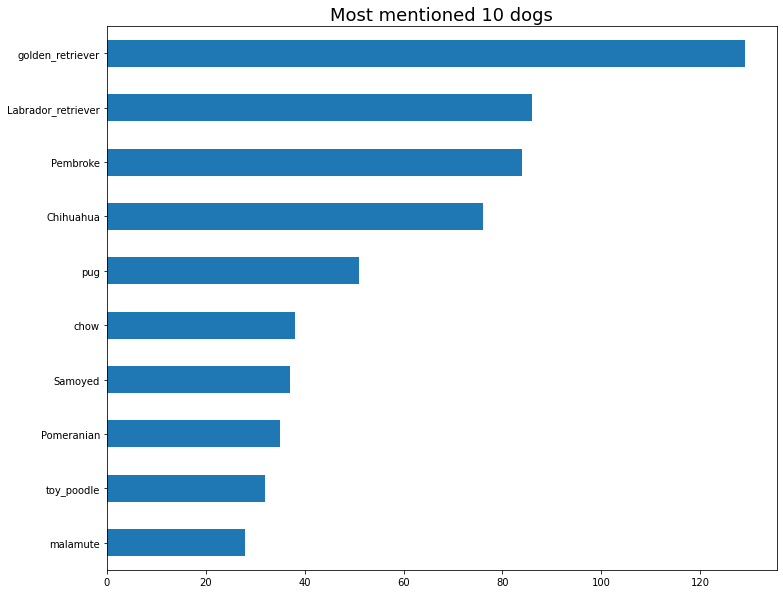

In [82]:
top10_gen[:10].sort_values().plot(kind='barh',figsize=(12,10))
plt.title('Most mentioned 10 dogs', fontsize=18)
plt.show()

In [59]:
breed_rt = master_df_clean.groupby('dog_breed')['retweet_count'].sum().sort_values(ascending=False)
top10_ret = breed_rt[:10].sort_values()

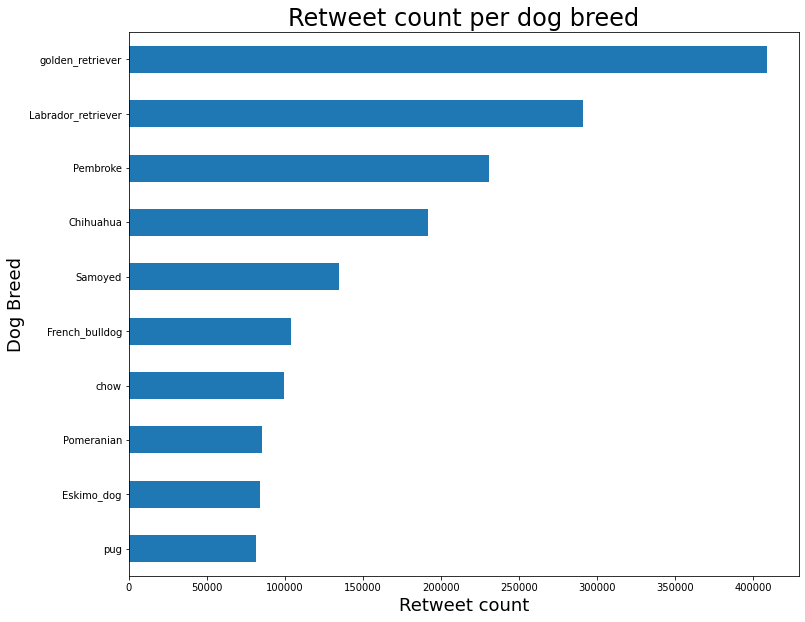

In [60]:
top10_ret.plot(kind='barh', figsize=(12,10))

plt.xlabel('Retweet count', fontsize=18)
plt.ylabel('Dog Breed', fontsize=18)
plt.title('Retweet count per dog breed', fontsize=24)

plt.show()

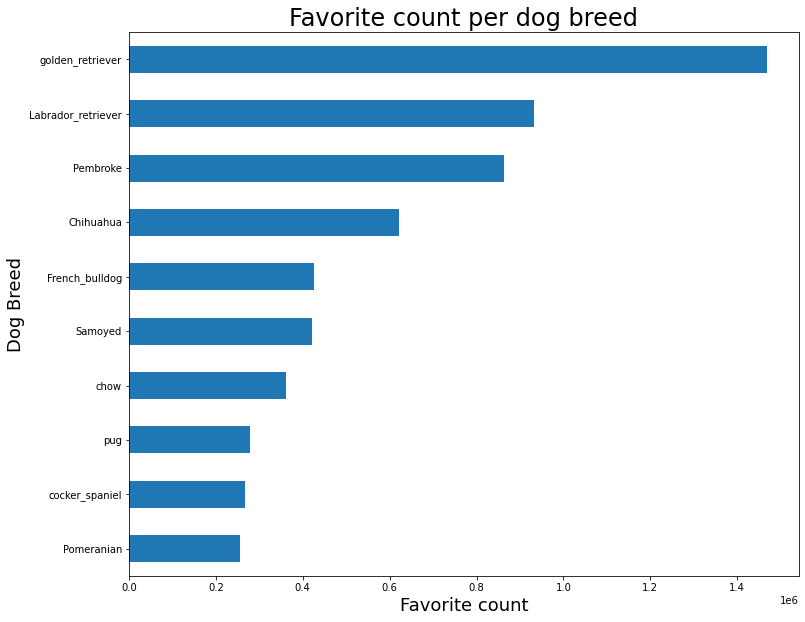

In [61]:
breed_rt = master_df_clean.groupby('dog_breed')['favorite_count'].sum().sort_values(ascending=False)
top10_fav= breed_rt[:10].sort_values()
top10_fav.plot(kind='barh', figsize=(12,10))

plt.xlabel('Favorite count', fontsize=18)
plt.ylabel('Dog Breed', fontsize=18)
plt.title('Favorite count per dog breed', fontsize=24)

plt.show()

**Most common dog stage**

In [62]:
stage_count= master_df_clean.dog_stage.value_counts().sort_values()
stage_count

floofer      3
puppo       27
doggo       67
pupper     204
Name: dog_stage, dtype: int64

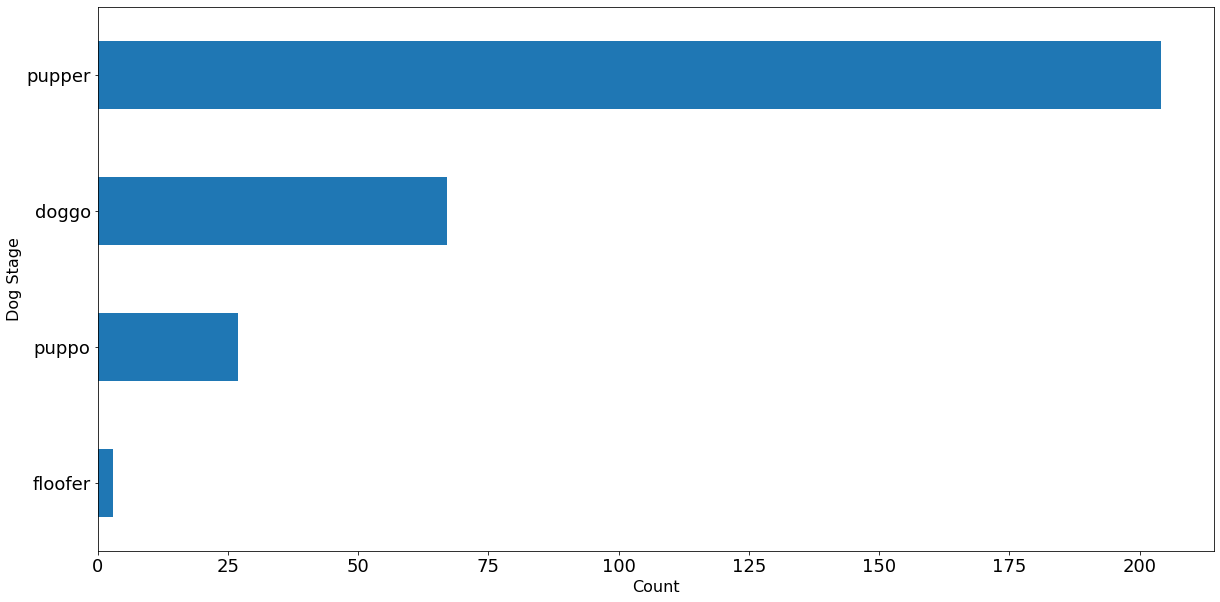

In [84]:
stage_count.plot(kind='barh', fontsize=18, figsize=(20,10))
plt.xlabel('Count', fontsize=16)
plt.ylabel('Dog Stage', fontsize=16)
plt.show()

**Interactions per month**

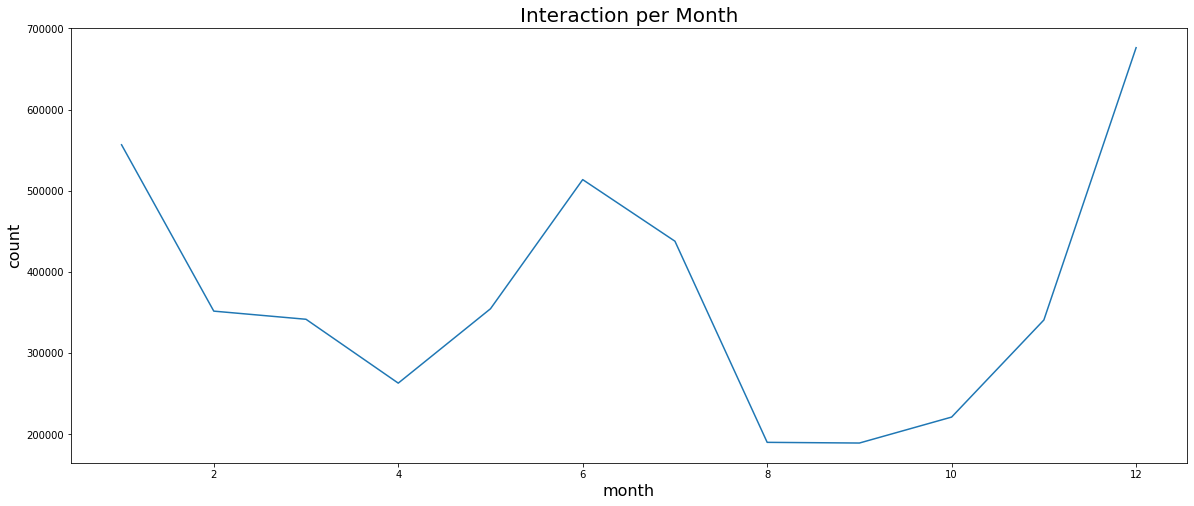

In [85]:
master_df_clean.groupby('month').retweet_count.sum().plot(kind='line',figsize=(20,8))
plt.xlabel('month', fontsize=16)
plt.ylabel('count',fontsize=16)
plt.title('Interaction per Month', fontsize=20)

plt.show()

**favorite correlation with retween count**

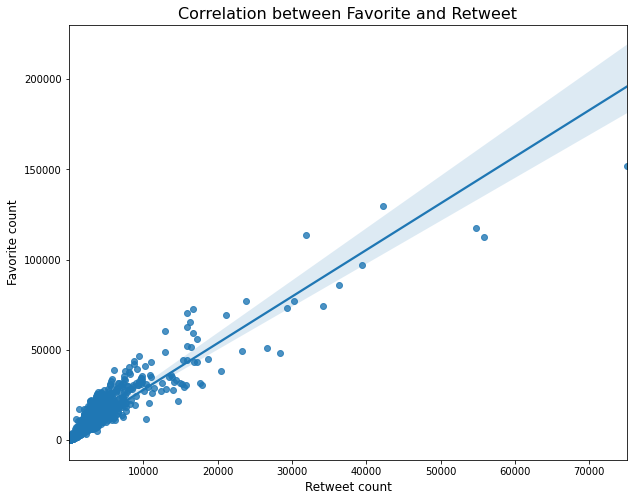

In [65]:
plt.figure(figsize=(10,8))
sns.regplot(x= 'retweet_count', y= 'favorite_count', data=master_df_clean)

plt.xlabel('Retweet count', fontsize=12)
plt.ylabel('Favorite count', fontsize=12)
plt.title('Correlation between Favorite and Retweet', fontsize=16)

plt.show()

**Most common follower name**

In [66]:
master_df_clean.name.mode()[0]

'Charlie'

**Most common category of rating**

In [67]:
master_df_clean.rating_binned.mode()[0]

'High'

In [68]:
rate= master_df_clean.rating_binned.value_counts().sort_values()
rate

Low         42
Medium     330
High      1469
Name: rating_binned, dtype: int64

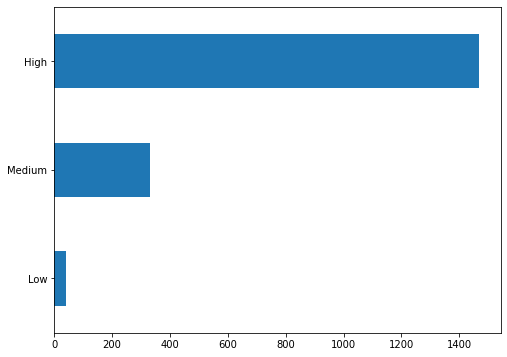

In [69]:
rate.plot(kind='barh', figsize=(8,6))
plt.show()

**Most occuring word in text:**

In [70]:
text = str(master_df_clean['text'])
image = np.array(Image.open('download.jpg'))
stopwords= set(STOPWORDS)

In [71]:
wc = WordCloud(background_color='white', mask=image,stopwords=stopwords).generate(text)

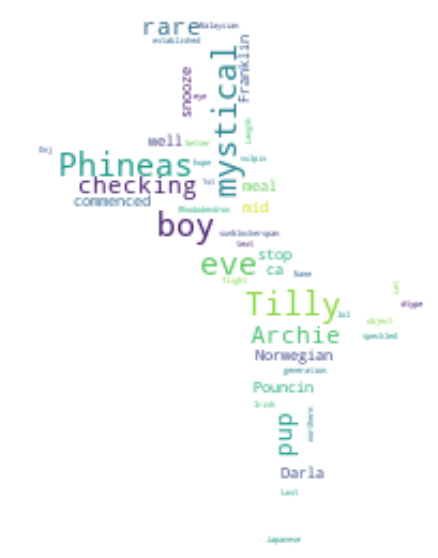

In [72]:
fig = plt.figure()
fig.set_figwidth(8) # set width
fig.set_figheight(10) # set height
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

plt.show()

**Let's see which dog breed is highly rated almost all the time!**

In [73]:
rating_df= master_df_clean.groupby('dog_breed')['rating_binned'].value_counts().sort_values(ascending=False)
rating_df

dog_breed           rating_binned
golden_retriever    High             122
Labrador_retriever  High              80
Pembroke            High              80
Chihuahua           High              61
pug                 High              38
                                    ... 
hummingbird         Medium             1
hyena               Medium             1
                    High               1
ibex                Medium             1
fiddler_crab        Medium             1
Name: rating_binned, Length: 490, dtype: int64

# Surprise!!  ALWAYS GOLDEN RETRIEVER